# Sounds of Success: Analyzing the Music Market

# 1) Objective Of The Proposed Research
Music holds a significant park of our daily lives, accompanying us during various activities such as exercising, driving, showering, and household chores. Often, its influence is so pervasive that we may not even consciously realize its impact.

In our pursuit of a deeper understanding of people's music preferences and a comprehensive examination of how the unprecedented events surrounding the pandemic have shaped the music landscape, here, NS Consulting is embarking on a data-driven journey.  To do this, we're using a dataset from Kaggle, which includes music features, platforms, charts and playlists.

Through this analysis, we aim to uncover the trends within the music industry, dissecting them by platform and year. Ultimately, our mission is to provide strategic insights and guidance to our stakeholders which are music labels, record companies, and entertainment enterprises, enabling them to navigate the evolving music market landscape with confidence and precision.

https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import dash
import csv
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.express as px
import plotly.graph_objs as go
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import plotly.io as pio

In [3]:
# Specify the file path to your CSV file
csv_file_path = "C:\\Users\\sbyeo\\Downloads\\spotify-2023.csv"

# Attempt to read the CSV file with 'utf-8' encoding
try:
    df = pd.read_csv(csv_file_path, encoding='utf-8')
except UnicodeDecodeError:
    # If 'utf-8' encoding fails, try 'latin-1' encoding
    df = pd.read_csv(csv_file_path, encoding='latin-1')

# Now you have your data in a DataFrame (df)
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


# 2) Data Exploration

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [5]:
df.shape

(953, 24)

In [6]:
df.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,67.812172,51.908709,2.666317,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,86.441493,50.630241,6.035599,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,13.000000,7.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,34.000000,38.000000,0.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,88.000000,87.000000,2.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,672.000000,275.000000,58.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


# 3) Data Cleaning

In [7]:
# Filter the DataFrame to select rows with released years between 2019 and 2023 (inclusive)
df['released_year'] = pd.to_numeric(df['released_year'], errors='coerce')
df1 = df[(df['released_year'] >= 2019) & (df['released_year'] <= 2023)].copy()

In [8]:
missing_values = df1.isnull().sum()
print("Missing values before filling with 0:\n", missing_values)

Missing values before filling with 0:
 track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        34
bpm                      0
key                     79
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64


In [9]:
df1 = df1.fillna(0)

In [10]:
missing_values2 = df1.isnull().sum()
print("Missing values after filling with 0:\n", missing_values2)

Missing values after filling with 0:
 track_name              0
artist(s)_name          0
artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
key                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
dtype: int64


In [11]:
# List of columns to convert to numerical data types
columns_to_convert = ['artist_count', 'released_month', 'released_day', 'in_spotify_playlists', 'in_spotify_charts',
                       'streams', 'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists', 'in_deezer_charts',
                       'in_shazam_charts', 'bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%',
                       'instrumentalness_%', 'liveness_%', 'speechiness_%']

# Convert the specified columns to numerical data types
df1[columns_to_convert] = df1[columns_to_convert].apply(pd.to_numeric, errors='coerce')

# Check the data types after conversion
print(df1[columns_to_convert].dtypes)

artist_count              int64
released_month            int64
released_day              int64
in_spotify_playlists      int64
in_spotify_charts         int64
streams                   int64
in_apple_playlists        int64
in_apple_charts           int64
in_deezer_playlists     float64
in_deezer_charts          int64
in_shazam_charts        float64
bpm                       int64
danceability_%            int64
valence_%                 int64
energy_%                  int64
acousticness_%            int64
instrumentalness_%        int64
liveness_%                int64
speechiness_%             int64
dtype: object


In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 769 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   track_name            769 non-null    object 
 1   artist(s)_name        769 non-null    object 
 2   artist_count          769 non-null    int64  
 3   released_year         769 non-null    int64  
 4   released_month        769 non-null    int64  
 5   released_day          769 non-null    int64  
 6   in_spotify_playlists  769 non-null    int64  
 7   in_spotify_charts     769 non-null    int64  
 8   streams               769 non-null    int64  
 9   in_apple_playlists    769 non-null    int64  
 10  in_apple_charts       769 non-null    int64  
 11  in_deezer_playlists   763 non-null    float64
 12  in_deezer_charts      769 non-null    int64  
 13  in_shazam_charts      764 non-null    float64
 14  bpm                   769 non-null    int64  
 15  key                   7

In [13]:
# Remove special characters from artist names
df1['artist(s)_name'] = df1['artist(s)_name'].str.replace(r'[½ï|½][ï¿]', '', regex=True)
df1['track_name'] = df1['track_name'].str.replace(r'[½ï|½][ï¿]', '', regex=True)

# 4) Data Visualization 1 - Numeric & Categorical Attributes

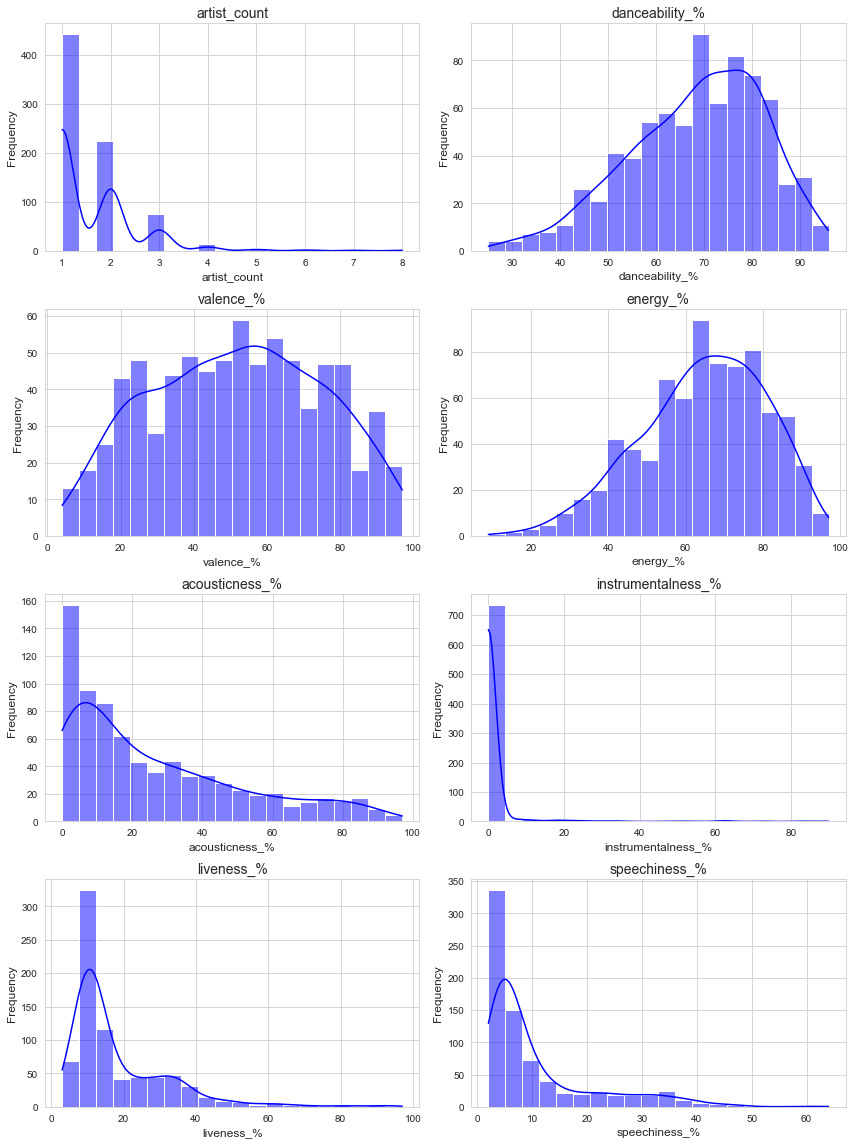

In [14]:
# Define numeric attributes
numeric_attributes = [
    'artist_count', 'danceability_%', 'valence_%', 'energy_%',
    'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'
]

# Set the style for seaborn plots (optional)
sns.set_style("whitegrid")

# Create subplots with a 4x2 grid
fig, axes = plt.subplots(4, 2, figsize=(12, 16))

# Flatten the 2D array of axes for easier indexing
axes = axes.flatten()

# Create histograms for numeric attributes
for i, col in enumerate(numeric_attributes):
    ax = axes[i]
    
    # Filter out NaN (non-numeric) values before creating histograms
    numeric_values = df1[col].dropna()
    
    sns.histplot(numeric_values, bins=20, ax=ax, kde=True, color='blue')
    
    ax.set_title(col, fontsize=14)
    ax.set_xlabel(col, fontsize=12)
    ax.set_ylabel('Frequency', fontsize=12)

# Remove any unused subplots
for i in range(len(numeric_attributes), len(axes)):
    fig.delaxes(axes[i])

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

>Each histogram provides insights into the distribution of values for its respective attribute in the dataset. The x-axis typically represents the range of values for the attribute, while the y-axis represents the frequency or count of songs falling within each range. The histograms with KDE (Kernel Density Estimation) plots also provide an estimate of the probability density function of the data.

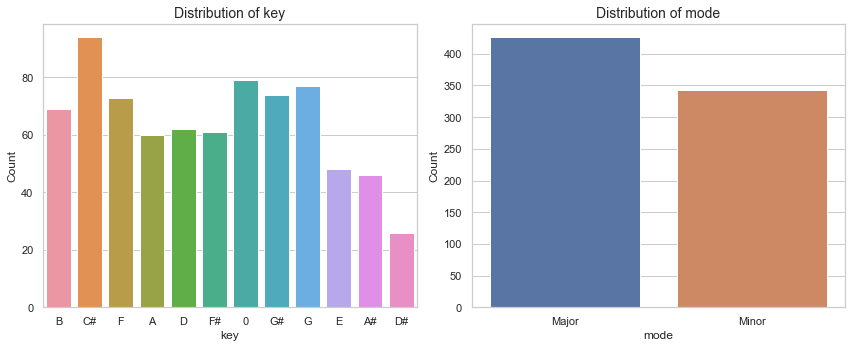

In [15]:
# Explore categorical attributes
categorical_attributes = ['key', 'mode']

# Set a seaborn style to improve plot aesthetics
sns.set(style="whitegrid")

# Create a figure and axes for subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Iterate through categorical attributes
for i, col in enumerate(categorical_attributes):
    sns.countplot(x=col, data=df1, ax=axs[i])
    axs[i].set_title(f'Distribution of {col}', fontsize=14)
    axs[i].set_xlabel(col, fontsize=12)
    axs[i].set_ylabel('Count', fontsize=12)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

>This plot shows the distribution of songs across different musical keys. Each bar represents a key, and the height of the bar indicates the count of songs in that key. It appears that the key "C#" has the highest count among the musical keys.
The plot on the right side illustrates the distribution of songs between two modes which are major and minor. It provides insights into the majority of songs in the dataset are in a major mode.

# 4) Data Visualization 2 - Correlation Heatmap

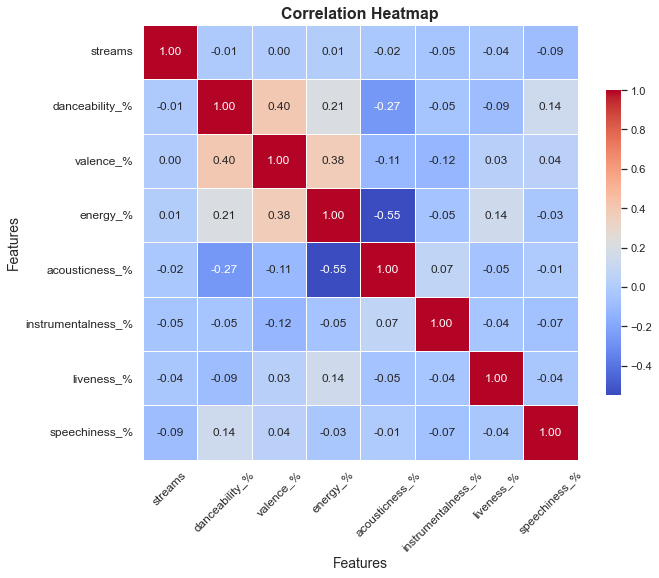

In [16]:
# Select numeric columns for correlation analysis
numeric_columns = ['streams', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']

# Calculate the correlation matrix
correlation_matrix = df1[numeric_columns].corr()

# Set the style of the heatmap
sns.set(font_scale=1)  # Adjust font size
plt.figure(figsize=(10, 8))

# Create a heatmap with customized attributes
sns.heatmap(correlation_matrix, 
            annot=True,             # Show correlation values
            cmap='coolwarm',        # Use the 'coolwarm' color map
            fmt='.2f',              # Format correlation values to two decimal places
            linewidths=0.5,         # Add linewidths between cells
            cbar=True,              # Show color bar
            square=True,            # Make the plot square
            annot_kws={'size': 12}, # Adjust font size of annotations
            cbar_kws={'shrink': 0.7},  # Adjust size of color bar
           )

# Customize plot labels and title
plt.title('Correlation Heatmap', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12, rotation=0)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Features', fontsize=14)

# Show the plot
plt.show()

>The purpose of the heatmap is to visualize the correlations between music streaming data (streams) and various music features. The heatmap shows that streams have a slight positive correlation with valence and no significant correlation with energy. On the other hand, streams have a slight negative correlation with danceability, acousticness, instrumentalness, liveness, and speechiness, suggesting a weak inverse relationship. Overall, it appears that streams and music features have minimal impact on each other based on these correlations.

# 4) Data Visualization 3 - Platform Presence In Market

In [17]:
# Create a Dash app
app = dash.Dash(__name__)

# Define the app layout
app.layout = html.Div([
    html.H1("Platform Presence In Market", style={'textAlign': 'center'}),

    dcc.Graph(id='chart-pie'),
])

# Define callback to update the pie chart
@app.callback(
    Output('chart-pie', 'figure'),
    [Input('chart-pie', 'relayoutData')]
)
def update_pie_chart(_):
    # Define the columns of interest (platforms)
    chart_columns = ['in_apple_charts', 'in_deezer_charts', 'in_shazam_charts', 'in_spotify_charts']

    # Convert non-numeric columns to numeric
    df1[chart_columns] = df1[chart_columns].apply(pd.to_numeric, errors='coerce')

    # Count the number of non-zero values in each column
    non_zero_counts = (df1[chart_columns] != 0).sum()

    # Exclude columns with 0 non-zero values
    non_zero_counts = non_zero_counts[non_zero_counts != 0]

    # Custom colors for the pie chart (in the same order as non_zero_counts)
    colors = ['#FF0000', '#FFA500', '#0000FF','#66FF66']  # Red, Green, Blue, Yellow

    # Explode slices (optional)
    explode = (0.1, 0.1, 0.1, 0.1)

    # Create the pie chart
    fig = go.Figure(
        data=[go.Pie(
            labels=['Apple', 'Deezer', 'Shazam', 'Spotify'],
            values=non_zero_counts,
            textinfo='percent+label',
            marker=dict(colors=colors),
            hole=0.3,
            pull=explode
        )],
        layout=dict(
            title='Platform Presence',
            title_font=dict(size=20),
            showlegend=True,
            legend=dict(
                title="Charts",
                x=1.15,
                y=0.5,
                bgcolor='rgba(255, 255, 255, 0.7)',
            )
        )
    )

    return fig

# Run the app
if __name__ == '__main__':
    app.run_server(port=8050, debug=True)

>This pie chart provides information about the percentage of songs present in each platform's chart. For example, it indicates that 36.3% of the songs are present in Apple's chart, 23.9% in Shazam's chart, 23% in Spotify's chart, and 16.8% in Deezer's chart. This visual representation allows for a quick and clear understanding of the distribution of songs across different music charts on these platforms.

# 4) Data Visualization 4 - Platform Presence Over the Years

In [18]:
# Create a Dash app
app = dash.Dash(__name__)

# Define chart columns and custom colors
chart_columns = ['in_apple_charts', 'in_deezer_charts', 'in_shazam_charts', 'in_spotify_charts']
custom_colors = {'in_apple_charts': 'red', 'in_shazam_charts': 'blue','in_deezer_charts': 'orange', 'in_spotify_charts': 'green'}

# Define app layout
app.layout = html.Div([
    html.H1("Platform Presence Over the Years (2019-2023)", style={'textAlign': 'center'}),
    
    dcc.Checklist(
        id='platform-checkboxes',
        options=[
            {'label': 'Apple Music', 'value': 'in_apple_charts'},
            {'label': 'Deezer', 'value': 'in_deezer_charts'},
            {'label': 'Shazam', 'value': 'in_shazam_charts'},
            {'label': 'Spotify', 'value': 'in_spotify_charts'}
        ],
        value=['in_apple_charts'],  # Default selected platform
        labelStyle={'display': 'block'}
    ),

    dcc.Graph(id='platform-presence-graph'),

])

# Define callback to update the graph based on selected platforms
@app.callback(
    Output('platform-presence-graph', 'figure'),
    Input('platform-checkboxes', 'value')
)
def update_platform_presence(selected_platforms):
    # Create a pivot table to summarize the presence of selected platforms for each year
    platform_presence = df1.pivot_table(index='released_year', values=selected_platforms, aggfunc='sum')

    # Filter out years with zero presence for all selected platforms
    platform_presence = platform_presence[(platform_presence.T != 0).any()]

    # Convert the index to integers to ensure integer years on the x-axis
    platform_presence.index = platform_presence.index.astype(int)

    # Create a line graph with custom colors
    fig = go.Figure()

    for platform in selected_platforms:
        fig.add_trace(go.Scatter(
            x=platform_presence.index,
            y=platform_presence[platform],
            mode='lines+markers',
            name=platform,
            marker=dict(color=custom_colors.get(platform, 'black')),
            text=[f'Year: {year}<br>Presence: {presence}' for year, presence in zip(platform_presence.index, platform_presence[platform])]
        ))

    fig.update_layout(
        xaxis_title='Year',
        yaxis_title='Presence',
        title='Platform Presence Over the Years (2019-2023)',
        legend_title='Platform',
        xaxis=dict(tickmode='linear', dtick=1),
        font=dict(size=12),
    )

    return fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True, port=8051)

>This line graph represents the presence of selected music platforms (Apple Music, Deezer, Shazam, Spotify) over the years, specifically from 2019 to 2023. Based on the observation, we've noted that Apple's presence steadily increased until 2022 and experienced a slight dip afterward, while Shazam demonstrated remarkable growth, especially after 2021. This line graph allows us to track the presence trends of these music platforms over time, providing insights into their popularity and performance.

# 4) Data Visualization 5 - Music Feature Proportions by Platform

In [19]:
# Define the columns of interest (platforms and music features)
platform_columns = ['in_apple_charts', 'in_deezer_charts', 'in_shazam_charts', 'in_spotify_charts']
music_feature_columns = ['danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%']

# Define a function to clean up feature names
def clean_feature_name(feature_name):
    # Remove trailing '_%' and capitalize the first letter of each word
    return feature_name.replace('_%', '').title()

# Convert non-numeric columns to numeric
df1[platform_columns + music_feature_columns] = df1[platform_columns + music_feature_columns].apply(pd.to_numeric, errors='coerce')

# Custom color palette for the radar charts (using HTML color names)
colors = ['red', 'orange', 'blue', 'green']  # Replace with your desired colors

# Function to generate radar chart data for a platform
def generate_radar_chart_data(platform_name, color):
    platform_sums = df1[df1[platform_name] == 1][music_feature_columns].sum()
    proportions = platform_sums / platform_sums.sum()

    categories = list(map(clean_feature_name, proportions.index))
    values = proportions.values

    # Convert the color name to RGB format (if using HTML color names)
    rgb_color = color  # If you're using HTML color names, no conversion needed

    return go.Scatterpolar(
        r=values.tolist() + [values[0]],
        theta=categories + [categories[0]],
        fill='toself',
        mode='lines+markers',
        name=f'{platform_name} Chart',
        marker=dict(
            color=rgb_color,  # Use the color here
            size=8,
            opacity=0.7,
            line=dict(
                color=rgb_color,
                width=2,
            ),
        ),
        line=dict(
            color=rgb_color,
            width=2,
        ),
    )

# Initialize the Dash app
app = dash.Dash(__name__)

# Define the app layout
app.layout = html.Div([
    html.H1("Music Feature Proportions by Platform (2019~2023)"), # style={'textAlign': 'center'}

    dcc.Dropdown(
        id='radar-chart-dropdown',
        options=[
            {'label': 'Apple Music', 'value': 'in_apple_charts'},
            {'label': 'Deezer', 'value': 'in_deezer_charts'},
            {'label': 'Shazam', 'value': 'in_shazam_charts'},
            {'label': 'Spotify', 'value': 'in_spotify_charts'}
        ],
        value=['in_apple_charts'],  # Default selected platforms
        multi=True,  # Allow multiple selection
    ),

    dcc.Graph(
        id='radar-chart',
        config={'displayModeBar': False},
    ),
])

# Define callback to update the radar chart based on selected platforms
@app.callback(
    Output('radar-chart', 'figure'),
    [Input('radar-chart-dropdown', 'value')]
)
def update_radar_chart(selected_platforms):
    data = []

    for platform_name, color in zip(platform_columns, colors):
        if platform_name in selected_platforms:
            data.append(generate_radar_chart_data(platform_name, color))

    layout = go.Layout(
    polar=dict(
        radialaxis=dict(
            showline=False,
            ticks='',
            angle=45,
            dtick=0.2,
            range=[0, 0.3],
        ),
    ),
    showlegend=True,
    legend=dict(
        orientation="h",  # Horizontal legend layout
        yanchor="bottom",
        y=1.02,
    ),
    margin=dict(l=20, r=20, t=80, b=20),  # Adjust plot margins
    hovermode='closest',  # Show feature values on hover
)

    return {'data': data, 'layout': layout}

# Run the app
if __name__ == '__main__':
    app.run_server(port=8052, debug=True)

>The radar charts represents the proportions of various music features across different music platforms (Apple Music, Deezer, Shazam, Spotify) over the years 2019 to 2023. Each radar chart provides insights into how these platforms compare in terms of music feature proportions. Based on our analysis, we've noted that danceability and energy are prominent features across the selected platforms, consistently appealing to music audiences. This radar chart visualization allows for a quick comparison of how these features vary among the platforms, providing insights into the music characteristics that resonate with listeners on each platform.

# 4) Data Visualization 6 - Distribution of BPM in Top 100 Chart Songs

In [20]:
# Initialize the Dash app
app = dash.Dash(__name__)

# Define the app layout
app.layout = html.Div([
    html.H1("Distribution of BPM by Platform", style={'textAlign': 'center', 'margin-top': '20px'}),
    
    dcc.Dropdown(
        id='platform-dropdown',
        options=[
            {'label': 'Spotify', 'value': 'Spotify'},
            {'label': 'Apple Music', 'value': 'Apple'},
            {'label': 'Shazam', 'value': 'Shazam'},
            {'label': 'Deezer', 'value': 'Deezer'},
        ],
        value='Spotify',
        style={'width': '50%', 'margin': 'auto', 'margin-top': '20px', 'font-size': '16px'}
    ),

    dcc.Graph(id='bpm-histogram'),

    html.Div(id='bpm-summary', style={'textAlign': 'left', 'margin-top': '20px', 'font-family': 'Arial', 'font-size': '16px'}),
])

# Define callback to update the histogram based on selected platform
@app.callback(
    [Output('bpm-histogram', 'figure'),
     Output('bpm-summary', 'children')],
    [Input('platform-dropdown', 'value')]
)
def update_histogram(selected_platform):
    platform_columns = {
        'Spotify': 'in_spotify_charts',
        'Apple': 'in_apple_charts',
        'Shazam': 'in_shazam_charts',
        'Deezer': 'in_deezer_charts',
    }

    platform_column = platform_columns.get(selected_platform)

    if platform_column is None:
        return go.Figure(), "No data available for the selected platform."

    if selected_platform == 'Spotify':
        df_platform = df_spotify
    elif selected_platform == 'Apple':
        df_platform = df_apple
    elif selected_platform == 'Shazam':
        df_platform = df_shazam
    elif selected_platform == 'Deezer':
        df_platform = df_deezer  # Load data for Deezer platform

    bpm_summary = df_platform['bpm'].describe()

    fig = px.histogram(df_platform, x='bpm', nbins=20, marginal='box', color_discrete_sequence=['green'])
    fig.update_layout(
        xaxis_title='BPM',
        yaxis_title='Frequency',
        title=f'Distribution of BPM in Top 100 Chart Songs for {selected_platform}',
        title_font=dict(size=24, family='Arial', color='navy'),
        xaxis=dict(tickfont=dict(size=14)),
        yaxis=dict(tickfont=dict(size=14)),
        margin=dict(l=80, r=80, t=80, b=80),  # Adjust plot margins
        plot_bgcolor='white',  # Set plot background colora
        xaxis_showgrid=False,  # Remove x-axis grid lines
        yaxis_showgrid=False,  # Remove y-axis grid lines
    )

    summary_text = f"Summary Statistics for BPM:\n{bpm_summary.to_string()}"

    return fig, summary_text

# Run the app
if __name__ == '__main__':
    app.run_server(port=8053, debug=True)

>Histogram and summary statistics represent the distribution of Beats Per Minute (BPM) in the top 100 chart songs for different music platforms (Spotify, Apple Music, Shazam, and Deezer). Spotify has a mean BPM of 124.92, closely followed by Apple Music at 124.49 BPM. The range of minimum and maximum BPM values varies slightly between platforms, reflecting the diversity of music styles. Additionally, the similarity in min-max BPM values between Shazam and Spotify suggests similarities in their music catalogs or styles. This plot allows you to compare the distribution of BPM values across different music platforms, providing insights into the tempo characteristics of the top 100 chart songs on each platform.

# 4) Data Visualization 7 - Popularity of Keys by Platform

In [21]:
# Define a reusable function for data filtering and sorting
def filter_and_sort_data(df, column_name):
    df[column_name] = pd.to_numeric(df[column_name], errors='coerce')
    filtered_df = df[df[column_name].between(1, 100)].copy()
    sorted_df = filtered_df.sort_values(by=column_name, ascending=True)
    sorted_df.reset_index(drop=True, inplace=True)
    return sorted_df

# Filter and sort data for each platform
df_spotify = filter_and_sort_data(df1, 'in_spotify_charts')
df_apple = filter_and_sort_data(df1, 'in_apple_charts')
df_shazam = filter_and_sort_data(df1, 'in_shazam_charts')

# Calculate the frequency of each key in the DataFrame
key_counts = df_spotify['key'].value_counts().reset_index()

# Rename the columns for clarity
key_counts.columns = ['Key', 'Frequency']

In [22]:
# Create a Dash app
app = dash.Dash(__name__)

# Define the app layout
app.layout = html.Div([
    html.H1("Popularity of Keys in the Top 100 Spotify Chart Songs", style={'textAlign': 'center'}),

    dcc.Graph(id='key-bar-chart'),

    html.Div(id='key-summary', style={'textAlign': 'center', 'margin-top': '20px', 'font-family': 'Arial'}),
])

# Load data for the 'Deezer' platform
df_deezer = filter_and_sort_data(df1, 'in_deezer_charts')

# Initialize the Dash app
app = dash.Dash(__name__)

# Define the app layout
app.layout = html.Div([
    html.H1("Popularity of Keys by Platform", style={'textAlign': 'center'}),

    dcc.Dropdown(
        id='platform-dropdown',
        options=[
            {'label': 'Spotify', 'value': 'Spotify'},
            {'label': 'Apple Music', 'value': 'Apple'},
            {'label': 'Shazam', 'value': 'Shazam'},
            {'label': 'Deezer', 'value': 'Deezer'},  # Add 'Deezer' as an option
        ],
        value='Spotify',  # Default selected platform
        style={'width': '50%', 'margin': 'auto', 'margin-top': '20px', 'font-size': '16px'}
    ),

    dcc.Graph(id='key-bar-plot'),

    html.Div(id='key-summary', style={'textAlign': 'center', 'margin-top': '20px', 'font-family': 'Arial'}),
])

# Define callback to update the bar plot
@app.callback(
    [Output('key-bar-plot', 'figure'),
     Output('key-summary', 'children')],
    [Input('key-bar-plot', 'relayoutData'),
     Input('platform-dropdown', 'value')]  # Include platform dropdown as an input
)
def update_bar_plot(_, selected_platform):
    try:
        # Choose the appropriate DataFrame based on the selected platform
        if selected_platform == 'Spotify':
            df_platform = df_spotify
        elif selected_platform == 'Apple':
            df_platform = df_apple
        elif selected_platform == 'Shazam':
            df_platform = df_shazam
        elif selected_platform == 'Deezer':
            df_platform = df_deezer  # Use the Deezer DataFrame

        # Calculate the frequency of each key in the selected platform's DataFrame
        key_counts = df_platform['key'].value_counts()

        # Create a bar plot to visualize the popularity of keys
        fig = px.bar(
            x=key_counts.index,
            y=key_counts.values,
            labels={'x': 'Key', 'y': 'Frequency'},
            title=f'Popularity of Keys in the Top 100 Chart Songs for {selected_platform}',
            text=key_counts.values,
        )

        fig.update_xaxes(type='category')
        fig.update_layout(
            xaxis=dict(tickfont=dict(size=12)),
            yaxis=dict(tickfont=dict(size=12)),
            title_font=dict(size=16, family='Arial', color='navy'),
            margin=dict(l=40, r=40, t=80, b=40),
        )

        # Format summary statistics as a string
        most_popular_key = key_counts.index[0]
        frequency = key_counts.iloc[0]
        summary_text = f"Most Popular Key: {most_popular_key}, Frequency: {frequency}"

        return fig, summary_text
    except Exception as e:
        error_message = str(e)
        return go.Figure(), f"An error occurred: {error_message}"

# Run the app
if __name__ == '__main__':
    app.run_server(port=8054, debug=True)


>This bar plots representing the popularity of musical keys in the top 100 songs across different music platforms (Spotify, Apple Music, Shazam, and Deezer). The analysis reveals which musical keys are most frequently used in the top 100 songs for the chosen platform. For spotify, Apple Music, and Shazam, the key of C# is the most popular, while for Deezer, the key of G is the most popular. These findings indicate the frequent use of these keys in chart-topping songs on each platform. This plot allows us to compare the popularity of musical keys across different music platforms, providing insights into the musical characteristics of the songs that resonate with audiences on each platform.

# 4) Data Visualization 8 - Top 10 Songs Analysis

In [23]:
# Create a Dash app
app = dash.Dash(__name__)

# Define the app layout
app.layout = html.Div([
    html.H1("Top 10 Songs Analysis"),
    
    # Dropdown for selecting the year
    dcc.Dropdown(
        id='year-dropdown',
        options=[
            {'label': str(year), 'value': year}
            for year in sorted(df1['released_year'].unique())
        ],
        value=df1['released_year'].max(),  # Default to the most recent year
        multi=False
    ),
    
    # Bar chart to display top songs
    dcc.Graph(id='top-songs-bar-chart'),
])

# Define callback to update the bar chart based on the selected year
@app.callback(
    Output('top-songs-bar-chart', 'figure'),
    [Input('year-dropdown', 'value')]
)
def update_bar_chart(selected_year):
    # Filter data for the selected year
    filtered_df = df1[df1['released_year'] == selected_year]
    
    # Select the top 10 songs for the year and sort by streams
    top_songs = filtered_df.nlargest(10, 'streams')
    
    # Create a bar chart
    fig = px.bar(
        top_songs,
        x='streams',
        y='track_name',
        color='artist(s)_name',
        labels={'track_name': 'Track Name', 'streams': 'Streams (Millions)'},
        title=f'Top 10 Songs of {selected_year}',
        orientation='h'
    )
    return fig

# Run the app
if __name__ == '__main__':
    app.run_server(port=8055, debug=True)

>We've examined the musical landscape of over 5 years. A closer look at 2023 reveals a striking shift in popular music genres. While pop remains a dominant force, it's accompanied by the rise of Latin and K-pop genres. These musical styles have garnered significant attention and a dedicated fan base, making them noteworthy players in the industry's ever-evolving sound.

# 4) Data Visualization 9 - Proportions of Music Features

In [24]:
# Create a Dash app
app = dash.Dash(__name__)

# Specify the columns of interest
columns_of_interest = ['danceability_%', 'valence_%', 'energy_%',
                       'acousticness_%', 'instrumentalness_%', 'liveness_%']

# Convert non-numeric values to NaN and fill NaN values with 0
df1[columns_of_interest] = df1[columns_of_interest].apply(pd.to_numeric, errors='coerce').fillna(0)

# Define colors for the pie chart
pie_colors = px.colors.qualitative.Pastel  # Use Plotly pastel color palette

# Define the app layout
app.layout = html.Div([
    html.H1("Proportions of Music Features"),

    # Dropdown for selecting the year
    dcc.Dropdown(
        id='year-dropdown',
        options=[
            {'label': str(year), 'value': year}
            for year in range(2019, 2024)
        ],
        value=2019,  # Default to the year 2019
        multi=False
    ),

    # Graph to display the pie chart
    dcc.Graph(id='pie-chart'),
])

# Define callback to update the pie chart based on the selected year
@app.callback(
    Output('pie-chart', 'figure'),
    [Input('year-dropdown', 'value')]
)
def update_pie_chart(selected_year):
    # Filter data for the selected year
    df_year = df1[df1['released_year'] == selected_year]

    # Calculate the sum of each column for the top 100 songs of the current year
    column_sums = df_year[columns_of_interest].sum()

    # Calculate the proportions
    proportions = column_sums / column_sums.sum()

    # Labels for the pie chart (remove '_%' suffix)
    labels = [column[:-2] for column in proportions.index]

    # Values for the pie chart
    values = proportions.values

    # Create a pie chart trace
    pie_trace = go.Pie(
        labels=labels,
        values=values,
        textinfo='percent+label',  # Show percentage and label
        hole=0.4,  # Create a donut chart
        marker=dict(colors=pie_colors),  # Use predefined colors
        pull=[0.1 if label == labels[values.argmax()] else 0 for label in labels],  # Explode the largest portion
    )

    # Define the layout for the pie chart
    pie_layout = go.Layout(
        title=f'Proportions of Music Features (Top 100 Songs, {selected_year})',
        title_x=0.5,  # Center the title
        font=dict(size=14),  # Set font size
        legend=dict(
            title='Features',
            x=1.2,  # Adjust legend position
            y=0.5,
            traceorder="normal",
        ),
    )

    # Create a Plotly figure
    fig = go.Figure(data=[pie_trace], layout=pie_layout)

    return fig

# Run the app
if __name__ == '__main__':
    app.run_server(port=8056, debug=True)

>Moving forward, our analysis extends to the distribution of music features across the past five years. As previously observed, dance and energetic genres have consistently captured the spotlight. However, an intriguing trend emerges when examining valence and acoustic attributes. This shift may signify a changing audience preference, leaning towards more positive and exhilarating musical experiences, especially in the aftermath of the pandemic.

# 4) Data Visualization 10 - Featured Artists by Years

In [25]:
# Filter out artists with names containing [½ï|½] using regular expressions
filtered_df = df1[~df1['artist(s)_name'].str.contains(r'[½ï|½]', case=False, regex=True)]

# Group by 'released_year' and 'artist(s)_name' and count the number of times each artist appears as a feature
featured_artist_counts = filtered_df.groupby(['released_year', 'artist(s)_name']).size().reset_index(name='count')

# Generate Word Clouds for each year based on artist_count
wordclouds = {}
for year in df1['released_year'].unique():
    # Filter the data for the specific year
    year_data = featured_artist_counts[featured_artist_counts['released_year'] == year]
    
    # Generate a Word Cloud for the featured artists of the year based on artist_count
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(year_data.set_index('artist(s)_name')['count'])
    wordclouds[year] = wordcloud

app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1('Featured Artists by Year'),
    
    # Dropdown to select the year
    dcc.Dropdown(
        id='year-dropdown',
        options=[{'label': year, 'value': year} for year in df1['released_year'].unique()],
        value=df1['released_year'].max(),  # Default to the most recent year
        multi=False
    ),
    
    # Word Cloud visualization
    dcc.Graph(id='word-cloud', config={'displayModeBar': False}),
])

# Callback for updating the Word Cloud based on the selected year
@app.callback(Output('word-cloud', 'figure'), Input('year-dropdown', 'value'))
def update_wordcloud(selected_year):
    wordcloud = wordclouds[selected_year]

    # Create a Word Cloud figure
    wordcloud_fig = go.Figure(go.Image(z=wordcloud.to_array()))
    wordcloud_fig.update_layout(
        xaxis=dict(visible=False),
        yaxis=dict(visible=False),
        width=800,
        height=400,
        margin=dict(l=0, r=0, b=0, t=0)
    )

    return wordcloud_fig

if __name__ == '__main__':
    app.run_server(port=8057, debug=True)

>Turning our attention to the involvement of featured artists, a striking surge in activity becomes evident, particularly we we compare 2019 and 2023, as indicated by the frequency of mentions. Notably, this trend showcases a global coming together of artists actively engaging in collaborative endeavors.

# 4) Data Visualization 11 - Released Albums Analysis

In [27]:
# Initialize the Dash app
app = dash.Dash(__name__)

# Define the app layout
app.layout = html.Div([
    html.H1("Released Albums Analysis", style={'textAlign': 'center'}),

    dcc.Graph(id='released-albums-heatmap'),

    dcc.Graph(id='released-albums-trend'),
])

# Define callback to update the heatmap and trend plot
@app.callback(
    [Output('released-albums-heatmap', 'figure'),
     Output('released-albums-trend', 'figure')],
    [Input('released-albums-heatmap', 'relayoutData')]
)
def update_plots(_):
    try:
        # Group by 'released_year' and count the number of albums released each year
        yearly_album_counts = df1['released_year'].value_counts().sort_index()

        # Group by 'released_year' and 'released_month' and count the number of occurrences
        album_counts = df1.groupby(['released_year', 'released_month']).size().reset_index(name='count')

        # Pivot the data to create a heatmap
        heatmap_data = album_counts.pivot(index='released_month', columns='released_year', values='count').fillna(0)

        # Create a figure for the heatmap
        heatmap_fig = go.Figure(data=go.Heatmap(
            z=heatmap_data.values,
            x=heatmap_data.columns,
            y=heatmap_data.index,
            colorscale='YlGnBu',
            hoverongaps=False
        ))
        heatmap_fig.update_xaxes(title='Year', type='category')
        heatmap_fig.update_yaxes(title='Month', type='category')
        heatmap_fig.update_layout(
            title_text='Released Albums Heatmap (2019-2023)',
            title_font=dict(size=20),  # Increase title font size
            xaxis=dict(tickfont=dict(size=14)),  # Increase tick font size
            yaxis=dict(tickfont=dict(size=14)),  # Increase tick font size
            margin=dict(l=80, r=20, b=80, t=80),  # Adjust plot margins
            plot_bgcolor='white',  # Set plot background color
            xaxis_showgrid=False,  # Remove x-axis grid lines
            yaxis_showgrid=False,  # Remove y-axis grid lines
        )

        # Create a figure for the trend plot
        trend_fig = px.line(
            yearly_album_counts,
            x=yearly_album_counts.index,
            y=yearly_album_counts.values,
            labels={'x': 'Year', 'y': 'Total Albums Released'},
            title='Trend of Released Albums (2019-2023)',
        )
        trend_fig.update_xaxes(type='category')
        trend_fig.update_xaxes(tickfont=dict(size=14))  # Increase tick font size
        trend_fig.update_yaxes(tickfont=dict(size=14))  # Increase tick font size
        trend_fig.update_layout(
            title_font=dict(size=20),  # Increase title font size
            margin=dict(l=80, r=20, b=80, t=80),  # Adjust plot margins
            plot_bgcolor='white',  # Set plot background color
            xaxis_showgrid=False,  # Remove x-axis grid lines
            yaxis_showgrid=False,  # Remove y-axis grid lines
        )

        return heatmap_fig, trend_fig
    except Exception as e:
        return go.Figure(), go.Figure()

# Run the app
if __name__ == '__main__':
    app.run_server(port=8058, debug=True)

>In an analysis of album releases spanning the last five years, the data clearly highlights 2022 as the year with the highest volume of album launches. Significantly, within this period, May emerges as the month with the highest concentration of album releases.

# 5) Conclusion

Before conclusions, please noted that using available but limited spotify data, this analysis sought to draw clear and accurate conclusions.

NS Consulting is committed to empowering stakeholders in the music industry with comprehensive insights. Our analysis drives into each music platform, offering detailed information. Furthermore, we provide an overview of the music market's trends over the last five years, from 2019 to 2023. By examining the industry's evolution, we equip businesses to anticipate future challenges and opportunities, especially in light of unprecedented events like the pandemic. Our goal is to support informed decision-making in the dynamic music landscape.

Our report was visualized through dashapp to make it easier for stakeholders to understand.

In summary, when it comes to music platform trends, Apple Music maintains its leading position in the industry. Nevertheless, it's essential to highlight the remarkable growth of Shazam, which is rapidly expanding its presence in the market.

In terms of music feature preferences, the music landscape leans heavily towards dynamic and energetic genres, with dance and high-energy styles taking the forefront. Notably, the key of C# and a tempo of around 120 BPM are the preferred musical elements among listeners.

Lastly, when we consider the evolution of the music market from 2019 to 2023, it becomes evident that the industry has undergone significant changes. This transformation is characterized by a diverse array of music genres gaining popularity, increased collaboration and featuring among artists, and a notable surge in album releases. It's interesting to observe that May emerges as a peak month within this vibrant musical landscape.